In [58]:
# Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from numpy import sqrt, array, random, argsort

<h2>Step 1: Data Preparation</h2>

In [59]:
# Read and load the data into a Pandas data frame
df = pd.read_csv('AGR_USERS.csv')

In [60]:
# Check the top five lines
df.head()

,AGR_NAME,UNAME,FROM_DAT,TO_DAT
0,GENERAL,MSEK,2017-01-15,9999-12-31
1,FINANCE,MSEK,2017-01-15,9999-12-31
2,IT SUPPORT,MSEK,2017-01-15,9999-12-31
3,HR SUPPORT,MSEK,2017-01-15,9999-12-31
4,AUDIT,MSEK,2017-01-15,9999-12-31


<h2>Step 2: Exploratory Data Analysis</h2>

In [61]:
# Get the size of the data. There are 25 rows and four columns in the provided sample dataset.
df.shape

(25, 4)

In [62]:
# Get summary statistics for all the data.
df.describe(include='all')

,AGR_NAME,UNAME,FROM_DAT,TO_DAT
count,25,25,25,25
unique,7,5,7,1
top,GENERAL,NJIN,2017-01-15,9999-12-31
freq,5,7,5,25


In [63]:
# Display the types of the columns.
df.dtypes

AGR_NAME    object
UNAME       object
FROM_DAT    object
TO_DAT      object
dtype: object

In [64]:
# Get unique values for the defined roles.
df['AGR_NAME'].unique()

array(['GENERAL', 'FINANCE', 'IT SUPPORT', 'HR SUPPORT', 'AUDIT', 'SCM',
       'HR ADMIN'], dtype=object)

In [65]:
# Show the unique users in the system.
df['UNAME'].unique()

array(['MSEK', 'BWIL', 'KPOP', 'PKLE', 'NJIN'], dtype=object)

Text(0, 0.5, 'SAP Role')

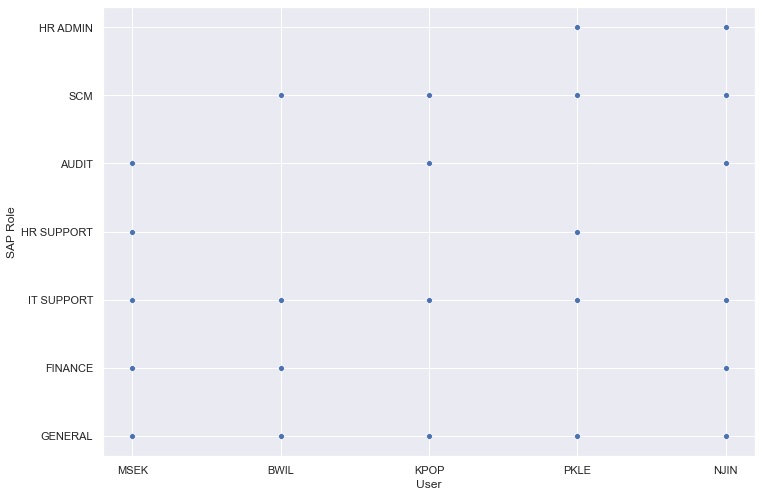

In [66]:
# Plot the SAP role vs. user. We will refine this figure below by formatting and adding more information to the plot.
sns.scatterplot(y = 'AGR_NAME', x = 'UNAME', data = df)
plt.xlabel('User')
plt.ylabel('SAP Role')

In [67]:
# Create a function to convert a string date to datetime format. The function also gets the no. of days between the day the analysis is run and the date the role was assigned in the ERP (SAP)
def date_convert(from_date_to_convert):
    delta = datetime.now() - datetime.strptime(from_date_to_convert, '%Y-%m-%d')
    return int(delta.total_seconds())//(24*3600)

In [68]:
# Create a column store the processed date differences with the applied transformations above
df['Access Days'] = df['FROM_DAT'].apply(date_convert)

In [69]:
# Check if it has run the function as expected
df.head()

,AGR_NAME,UNAME,FROM_DAT,TO_DAT,Access Days
0,GENERAL,MSEK,2017-01-15,9999-12-31,1764
1,FINANCE,MSEK,2017-01-15,9999-12-31,1764
2,IT SUPPORT,MSEK,2017-01-15,9999-12-31,1764
3,HR SUPPORT,MSEK,2017-01-15,9999-12-31,1764
4,AUDIT,MSEK,2017-01-15,9999-12-31,1764


<h2>Step 3: Scatter Plot of ERP Access</h2>

Text(0, 0.5, 'SAP Role')

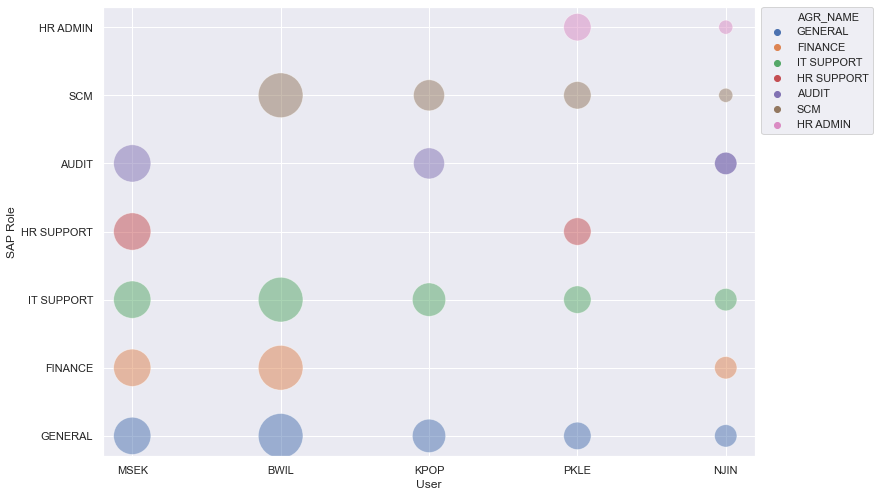

In [70]:
# Set environment options such as theme and size of the figure. We will need a bigger size than the standard size. You can adjust this if you have more roles or users
sns.set_context('talk')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create a scatter plot as above. The following options were set here:
# Set transparency to 50% (alpha).
# Set the size of the bubbles to be the Access days we calculated above. Also set the scale for the sizes.
# Show the legend box.
# Color the bubbles with distinct colors (palette) based on the role.
g = sns.scatterplot(y = 'AGR_NAME', x = 'UNAME', data = df, alpha = 0.5, size='Access Days', sizes=(200, 2000), legend = 'full', hue = 'AGR_NAME', palette = 'deep')

# The next two lines of code moves the legend to the right so the bubbles are better visible.
h,l = g.get_legend_handles_labels()
plt.legend(h[0:8], l[0:8], bbox_to_anchor=(1.18, 1), loc='upper right', borderaxespad=0)

# Set the X-axis and Y-axis titles.
plt.xlabel('User')
plt.ylabel('SAP Role')